In [278]:
import numpy as np
from collections import deque

In [279]:
class NetworkProcessor4:
    def __init__(self):
      self.lines_list = [] #line ,a b,d c
      #
      self.edges = [] # Split \n, \t
      self.nodes = []
      #
      self.network_array = []
      self.undirected_network_array = []
      #
      self.final_path_BFS = []
      self.final_path_DFS = []

    def read_file(self, file_path):
      with open(file_path, 'r') as file:
        line = file.readline()
        while line:
          self.lines_list.append(line)
          line = file.readline()

    def get_edges(self):
      edge = [item.strip('\n') for item in self.lines_list]
      self.edges = [item.split('\t') for item in edge]

    def get_unique_nodes(self):
      all_nodes = [item for sublist in self.edges for item in sublist]
      unique_nodes = list(set(all_nodes))
      self.nodes = sorted(unique_nodes)

    def get_network_array(self):
      self.network_array = np.zeros((len(self.nodes), len(self.nodes)), dtype=int)
      for start_node, end_node in self.edges:
        row = self.nodes.index(start_node)
        col = self.nodes.index(end_node)
        self.network_array[row, col] = 1

    def get_undirected_network_array(self):
      self.undirected_network_array = np.maximum(self.network_array, self.network_array.T)#改成無相圖
      print('Undirected Network Array \n',self.undirected_network_array,'\n')

    def is_cut_node(self): #判斷cut_node
      def BFS(new_matrix, cut_node, cut_nodes):
        visited = [False] * (len(self.nodes)-1) #標記為未訪問
        queue = deque([0])  #佇列(0or1or2...)
        visited[0] = True #標記為已訪問
        while queue:
          current_node = queue.popleft() #從左側取一個(原本也只有一個)
          for neighbor in range(len(self.nodes)-1): #0~8每個都跑一次
            if new_matrix[current_node][neighbor] == 1 and not visited[neighbor]: #矩陣位置要=1,且不能與node為同一點
              visited[neighbor] = True #如果達成上述條件neighbor被設定為已訪問
              queue.append(neighbor)#把他加入queue內
        if not np.all(visited): #檢查布林列表visited中的所有元素是否都為True#如果無法訪問所有點，則不是連通圖
          cut_nodes.append(self.nodes[cut_node])
          return
      cut_nodes = []
      for j in range(len(self.nodes)):
        undirected_adj_matrix1 = self.undirected_network_array.copy()
        cut_node = j
        new_matrix = np.delete(undirected_adj_matrix1, j, axis=0)
        new_matrix = np.delete(new_matrix, j, axis=1)#刪除指定行列
        BFS(new_matrix, cut_node, cut_nodes)
      return print('Cut point(node) is ',cut_nodes)

    def is_cut_edge(self):
        cut_edge = []
        for j in range(len(self.nodes)):
          for k in range(len(self.nodes)):
            undirected_adj_matrix2 = self.undirected_network_array.copy()
            undirected_adj_matrix2[j,k] = 0
            undirected_adj_matrix2[k,j] = 0  #把特定邊都刪掉
            #BFS
            for i in range(len(self.nodes)):
              visited = [False] * len(self.nodes) #標記為未訪問
              queue = deque([i])  #佇列(0or1or2...)
              visited[i] = True #標記為已訪問
              while queue:
                current_node = queue.popleft() #從左側取一個(原本也只有一個)
                for neighbor in range(len(self.nodes)): #0~8每個都跑一次
                  if undirected_adj_matrix2[current_node][neighbor] == 1 and not visited[neighbor]: #矩陣位置要=1,且不能與node為同一點
                    visited[neighbor] = True #如果達成上述條件neighbor被設定為已訪問
                    queue.append(neighbor)#把他加入queue內
            if not np.all(visited) and self.undirected_network_array[j,k] == 1: #檢查布林列表visited中的所有元素是否都為True#如果無法訪問所有點，則不是連通圖
              cut_edge.append((self.nodes[j],self.nodes[k]))
        cut_edge_sorted = []
        for i in cut_edge:#整理
          cut_edge_sorted.append(tuple(sorted(i)))
        return print('Cut Edge =',sorted(set(cut_edge_sorted)))

    def get_BFS_span(self, start_node):
      print('BFS')
      visited = [False] * len(self.nodes)
      start_node_index = self.nodes.index(start_node)
      queue = [(start_node_index, [start_node])]
      visited[start_node_index] = True
      while queue:
        current_node, path = queue.pop(0)
        for neighbor in range(len(self.nodes)):
          if self.undirected_network_array[current_node][neighbor] == 1 and not visited[neighbor]:
            visited[neighbor] = True
            queue.append((neighbor, path + [self.nodes[neighbor]]))
        print(path)
        self.final_path_BFS.append(path)

    def get_DFS_span(self, start_node):
      print('DFS')
      visited = [False] * len(self.nodes)
      start_node_index = self.nodes.index(start_node)
      def dfs_recursive(current_node, path=[]):
        visited[current_node] = True
        path.append(self.nodes[current_node])
        #print(path)
        self.final_path_DFS.append(path[:])
        for neighbor in range(len(self.nodes)):
          if self.undirected_network_array[current_node][neighbor] == 1 and not visited[neighbor]:
            dfs_recursive(neighbor, path)
        path.pop()
      dfs_recursive(start_node_index)
      return self.final_path_DFS
      print(final_path_DFS)



### 1. find one cut-point and one cut-edge

In [280]:
#network
network = NetworkProcessor4()
network.read_file('Network1.txt')
network.get_edges()
network.get_unique_nodes()
network.get_network_array()
network.get_undirected_network_array()
network.is_cut_node()

Undirected Network Array 
 [[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0]
 [0 0 1 1 0 1 1 1 1]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 1 1 1 0 1 0]
 [0 0 0 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]] 

Cut point(node) is  ['b', 'c', 'e']


In [281]:
network.is_cut_edge()

Cut Edge = [('a', 'b'), ('b', 'c'), ('c', 'e'), ('e', 'i')]


### 2. identify two spanning trees of network 1
• one is DFS tree; another is BFS tree

In [282]:
network.get_BFS_span('a')

BFS
['a']
['a', 'b']
['a', 'b', 'c']
['a', 'b', 'c', 'e']
['a', 'b', 'c', 'e', 'd']
['a', 'b', 'c', 'e', 'f']
['a', 'b', 'c', 'e', 'g']
['a', 'b', 'c', 'e', 'h']
['a', 'b', 'c', 'e', 'i']


In [283]:
network.get_DFS_span('a')

DFS


[['a'],
 ['a', 'b'],
 ['a', 'b', 'c'],
 ['a', 'b', 'c', 'e'],
 ['a', 'b', 'c', 'e', 'd'],
 ['a', 'b', 'c', 'e', 'd', 'f'],
 ['a', 'b', 'c', 'e', 'd', 'f', 'g'],
 ['a', 'b', 'c', 'e', 'd', 'f', 'g', 'h'],
 ['a', 'b', 'c', 'e', 'i']]

### 3. do following operations on the two identified trees
• edge complementation

• join

• union

• intersection

• difference: (DFS - BFS) and (BFS - DFS)

### graph of bfs & DFS

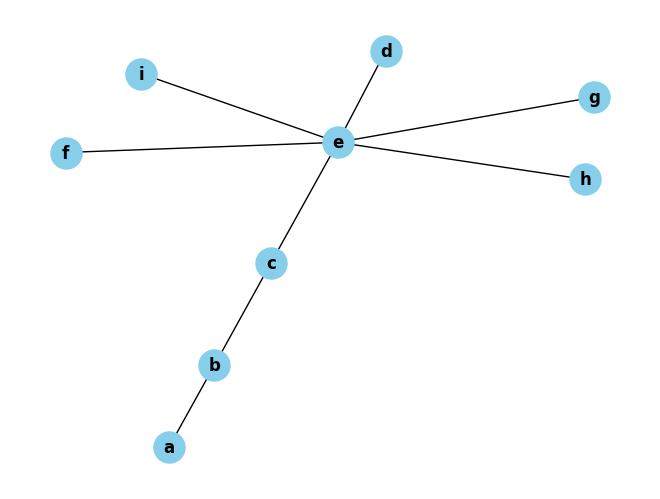

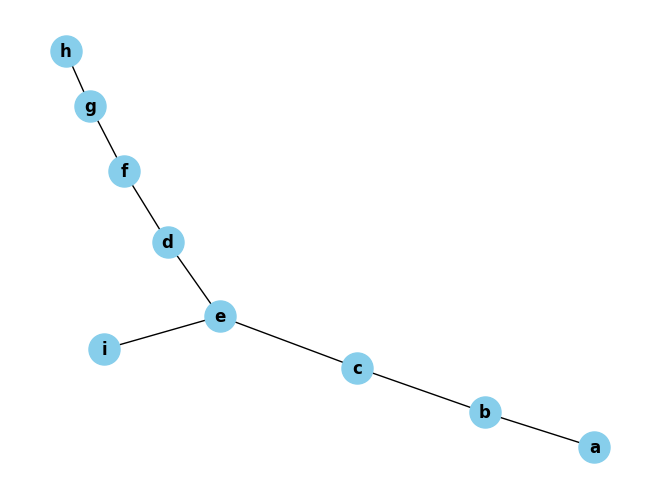

In [284]:
#graph of BFS & DFS
def path_type_transform(final_path):
  formatted_paths = []
  for path in final_path:
    if len(path) > 1:
      for n in range(len(path)-1):
        formatted_paths.append((path[n], path[n+1]))
  formatted_paths = sorted(set(formatted_paths))
  #print(formatted_paths)
  return formatted_paths

#graph of formatted_paths_BFS,formatted_paths_DFS
def network_X(formatted_paths,unique_elements):
  import networkx as nx
  import matplotlib.pyplot as plt
  G = nx.Graph()
  G.add_nodes_from(unique_elements)
  G.add_edges_from(formatted_paths)
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', font_weight='bold')
  plt.show()

#path_type_transform改成networkX吃得進去的格式
formatted_paths_DFS = path_type_transform(network.final_path_DFS) #network.
formatted_paths_BFS = path_type_transform(network.final_path_BFS) #network.
#graph of two trees
network_X(formatted_paths_BFS,network.nodes)
network_X(formatted_paths_DFS,network.nodes)

### edge complementation

Undirected Network Array 
 [[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]] 

BFS trees edge complementation


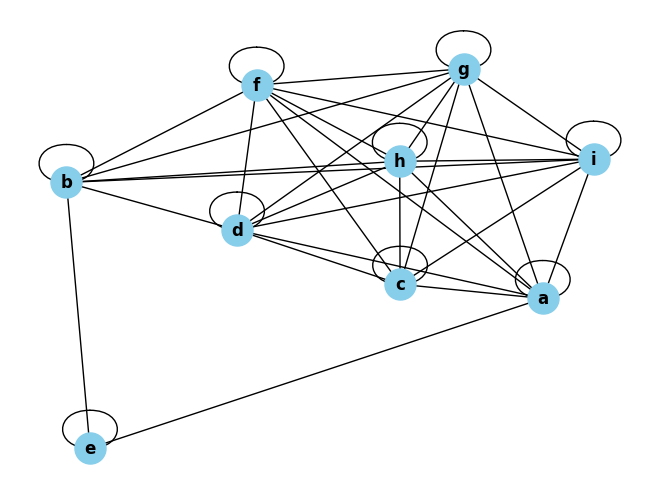

Undirected Network Array 
 [[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 1 1 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]] 

DFS trees edge complementation


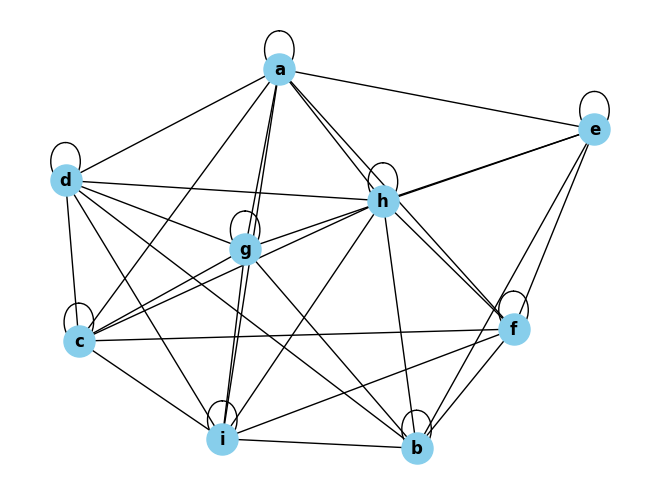

In [285]:
#製作兩個tree的edge complementation matrix
#Complementation_Adjacency_Matrix# 將1改為0，0改為1
def Complementation_Matrix(adjacency_matrix):
  complemented_matrix = np.where(adjacency_matrix == 1, 0, 1)
  return complemented_matrix
def matrix_to_edge_list(adjacency_matrix,node_names):
  edges = []
  num_nodes = len(node_names)
  for i in range(num_nodes):
    for j in range(i, num_nodes):
      if adjacency_matrix[i][j] == 1:
        edges.append((node_names[i], node_names[j]))
  return edges
DFS_BFS_name = ['BFS trees edge complementation','DFS trees edge complementation']
DFS_BFS = [formatted_paths_BFS,formatted_paths_DFS]
for i in range(2):
  DFS_BFS_network = NetworkProcessor4()
  DFS_BFS_network.edges = DFS_BFS[i]
  DFS_BFS_network.get_unique_nodes()
  DFS_BFS_network.get_network_array()
  DFS_BFS_network.get_undirected_network_array()
  #
  complementation_adjacency_matrix = Complementation_Matrix(DFS_BFS_network.undirected_network_array)
  #print(Complementation_Adjacency_Matrix_BFS)
  edge = matrix_to_edge_list(complementation_adjacency_matrix,network.nodes)
  #print(edge_BFS)
  print(DFS_BFS_name[i])
  network_X(edge,network.nodes)

### join

join


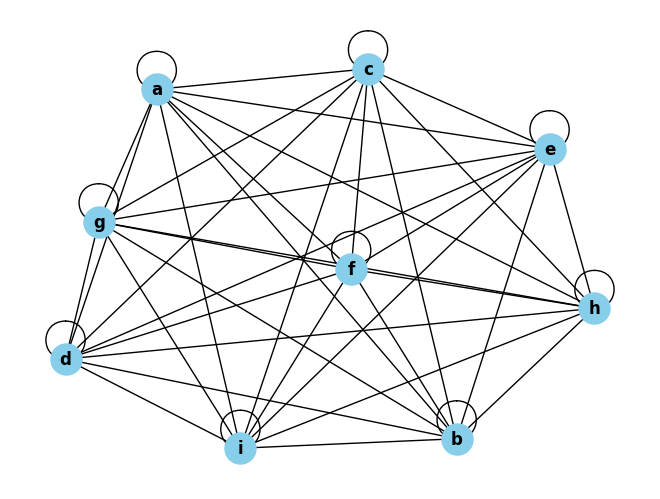

In [286]:
#join
unique_elements_BFS = sorted(set(item for sublist in formatted_paths_BFS for item in sublist))
unique_elements_DFS = sorted(set(item for sublist in formatted_paths_BFS for item in sublist))
unique_elements_DFS_BFS = [x for x in unique_elements_DFS if x in unique_elements_BFS]
num_nodes = len(unique_elements_DFS_BFS)
join_matrix = np.ones((num_nodes, num_nodes))
join_edge = matrix_to_edge_list(join_matrix,DFS_BFS_network.nodes)
print('join')
network_X(join_edge,DFS_BFS_network.nodes)

### union

[('a', 'b'), ('b', 'c'), ('c', 'e'), ('d', 'f'), ('e', 'd'), ('e', 'f'), ('e', 'g'), ('e', 'h'), ('e', 'i'), ('f', 'g'), ('g', 'h')]


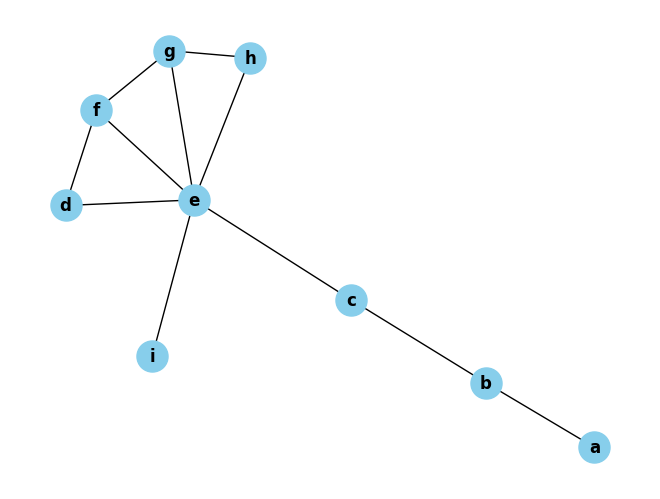

In [287]:
#union聯集
formatted_paths_union = formatted_paths_BFS + formatted_paths_DFS
print(sorted(set(formatted_paths_union)))
#
network_X(formatted_paths_union,DFS_BFS_network.nodes)


### intersection

[('a', 'b'), ('b', 'c'), ('c', 'e'), ('e', 'd'), ('e', 'i')]


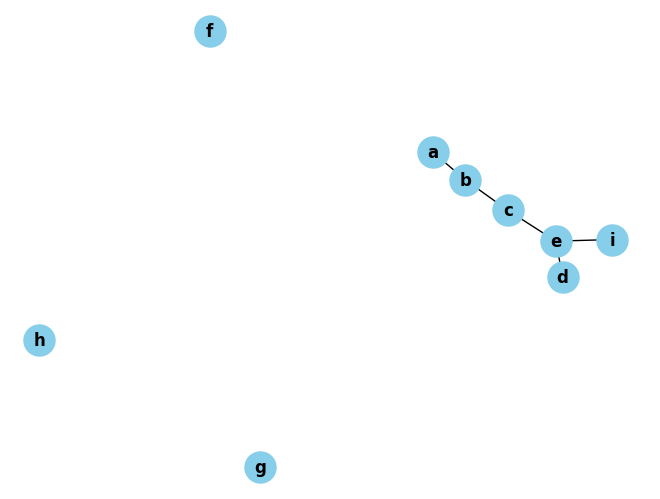

In [288]:
#intersection交集
formatted_paths_intersection = []
for edge1 in formatted_paths_BFS:
  for edge2 in formatted_paths_DFS:
    if edge1 == edge2:
      formatted_paths_intersection.append(edge1)

print(sorted(set(formatted_paths_intersection)))
#
network_X(formatted_paths_intersection,DFS_BFS_network.nodes)


### difference: (DFS - BFS) and (BFS - DFS)

formatted_paths_DFS-BFS
[('d', 'f'), ('f', 'g'), ('g', 'h')]


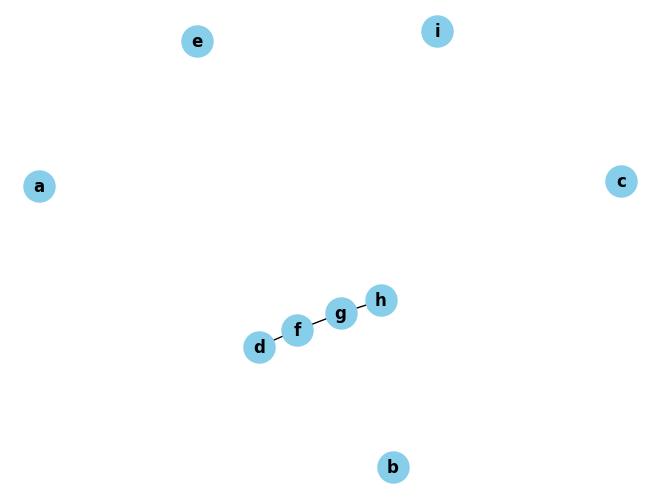

formatted_paths_BFS-DFS
[('e', 'f'), ('e', 'g'), ('e', 'h')]


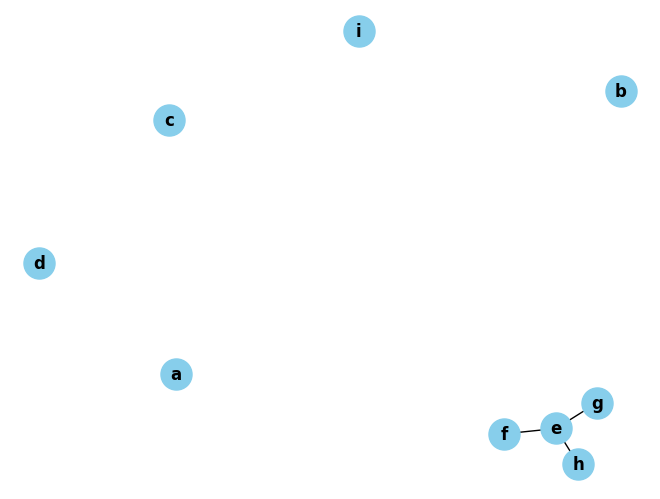

In [289]:
#difference: (DFS - BFS) and (BFS - DFS)
#formatted_paths_DFS_BFS = []
formatted_paths_DFS_BFS = [x for x in formatted_paths_DFS if x not in formatted_paths_intersection]
unique_elements_DFS = sorted(set(item for sublist in formatted_paths_DFS for item in sublist))
formatted_paths_BFS_DFS = [x for x in formatted_paths_BFS if x not in formatted_paths_intersection]
unique_elements_BFS = sorted(set(item for sublist in formatted_paths_BFS for item in sublist))
#
print('formatted_paths_DFS-BFS')
print(sorted(set(formatted_paths_DFS_BFS)))
network_X(formatted_paths_DFS_BFS,unique_elements_DFS)
#
print('formatted_paths_BFS-DFS')
print(sorted(set(formatted_paths_BFS_DFS)))
network_X(formatted_paths_BFS_DFS,unique_elements_BFS)
